In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

Life_Exp = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [3]:
#missing Value and interpolation

Life_Exp.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [4]:
Life_Exp.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
#Data Type

Life_Exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                     2938 non-null object
Year                        2938 non-null int64
Status                      2938 non-null object
Life_Expectancy             2928 non-null float64
Adult_Mortality             2928 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2744 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2385 non-null float64
Measles                     2938 non-null int64
BMI                         2904 non-null float64
Under_Five_Deaths           2938 non-null int64
Polio                       2919 non-null float64
Tot_Exp                     2712 non-null float64
Diphtheria                  2919 non-null float64
HIV/AIDS                    2938 non-null float64
GDP                         2490 non-null float64
Population                  2286 non-null float64
thi

In [6]:
#Identifying null values

Life_Exp.isnull().sum()*100/Life_Exp.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [7]:
country_list = Life_Exp.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','thinness_5to9_years','Income_Comp_Of_Resources','Schooling']

In [8]:
#Removing null values usin interplation

for country in country_list:
    Life_Exp.loc[Life_Exp['Country'] == country,fill_list] = Life_Exp.loc[Life_Exp['Country'] == country,fill_list].interpolate()
    
Life_Exp.dropna(inplace=True)   

In [9]:
#veryfying nulls

Life_Exp.isnull().sum()


Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

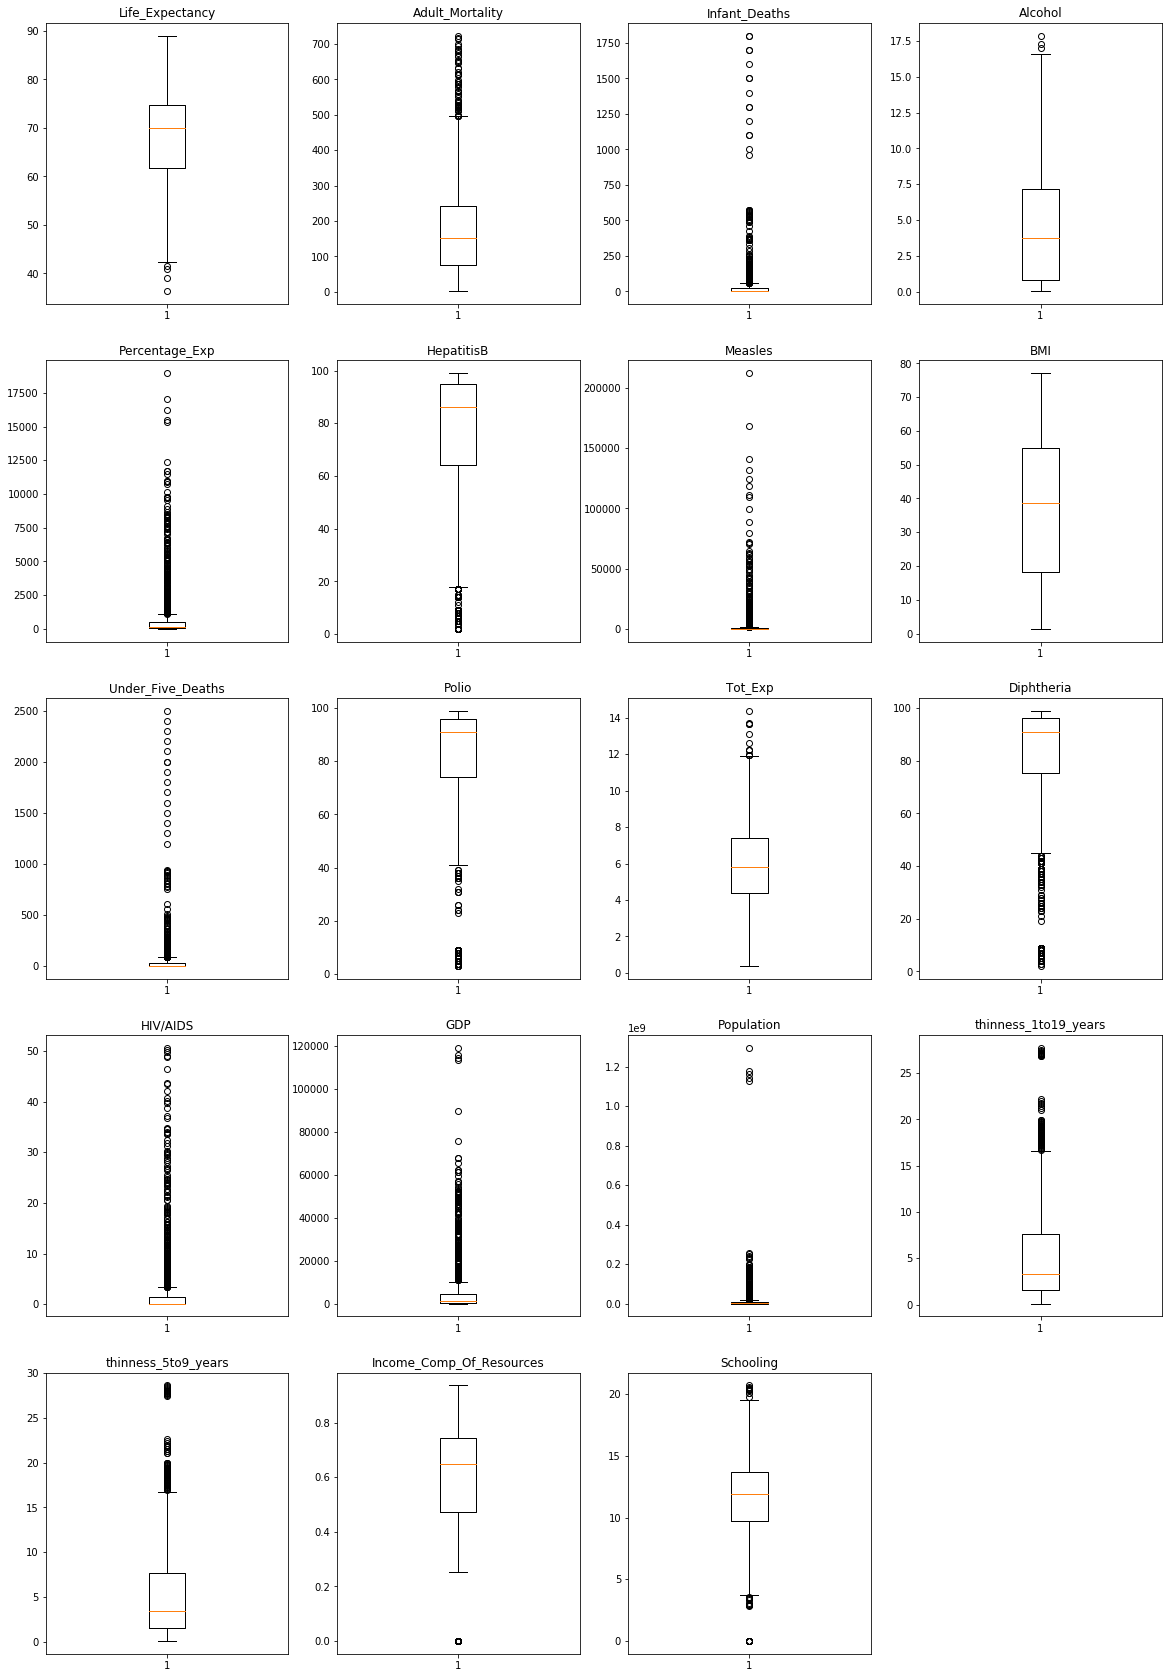

In [10]:
# Creating column of dictionaries
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}


#Detecting outliers in each variabale using boxplot

plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Life_Exp[variable],whis=1.5)
                     plt.title(variable)

plt.show()

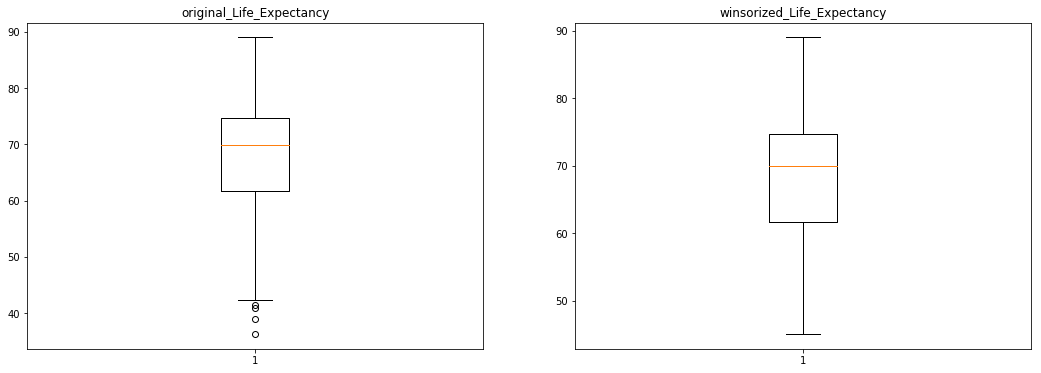

In [11]:
## Removing Outliers in the variables using Winsorization technique.

# Winsorize Life_Expectancy
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = Life_Exp['Life_Expectancy']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(Life_Exp['Life_Expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()


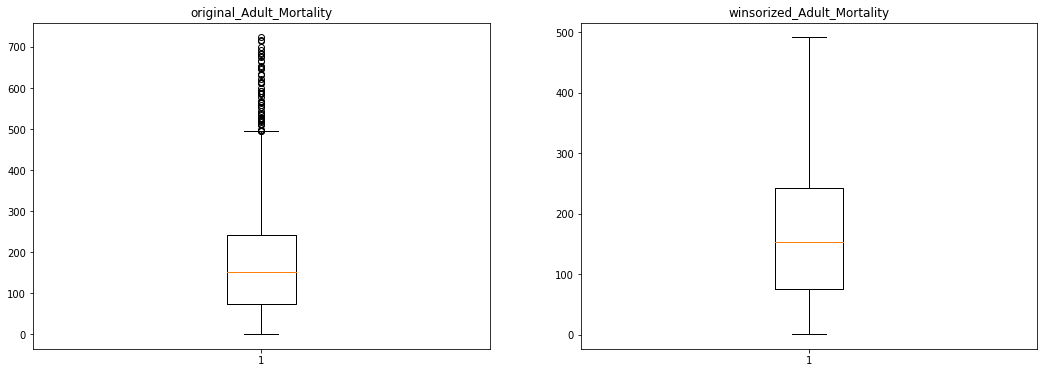

In [12]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = Life_Exp['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(Life_Exp['Adult_Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

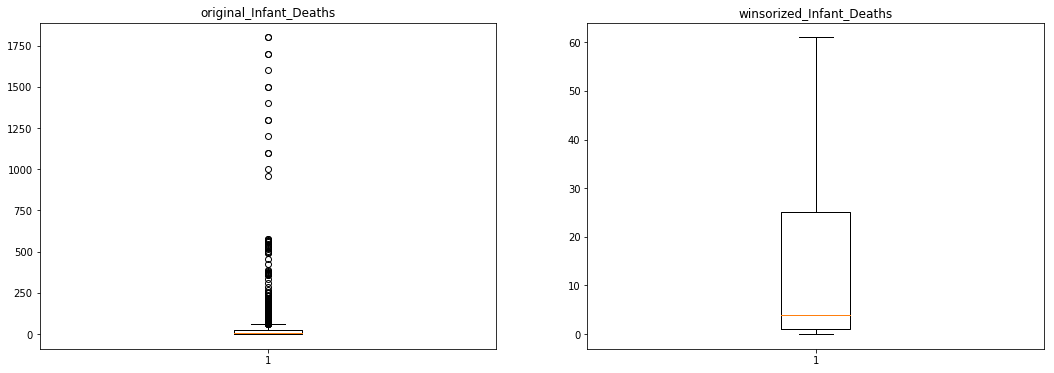

In [13]:
# Winsorize Infant_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = Life_Exp['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(Life_Exp['Infant_Deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()


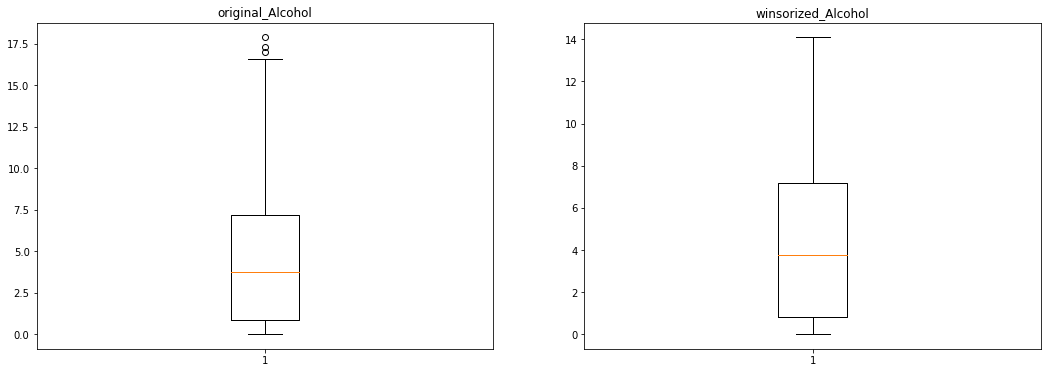

In [14]:
# Winsorize Alcohol
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = Life_Exp['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(Life_Exp['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

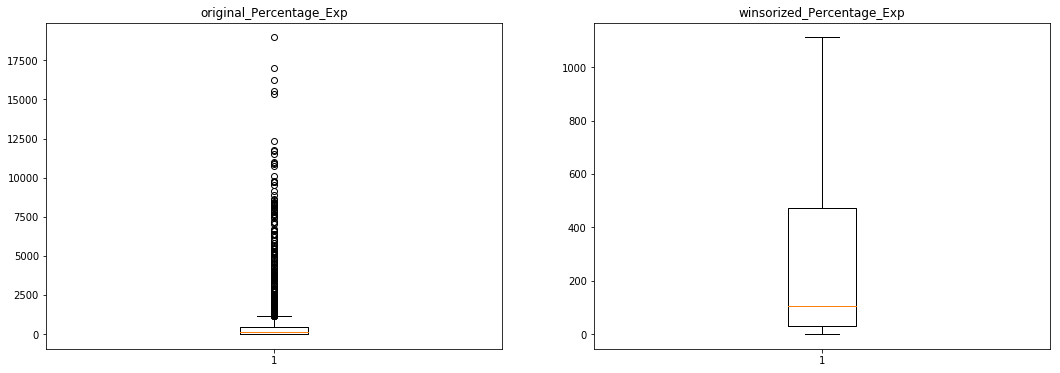

In [15]:
# Winsorize Percentage_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = Life_Exp['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(Life_Exp['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

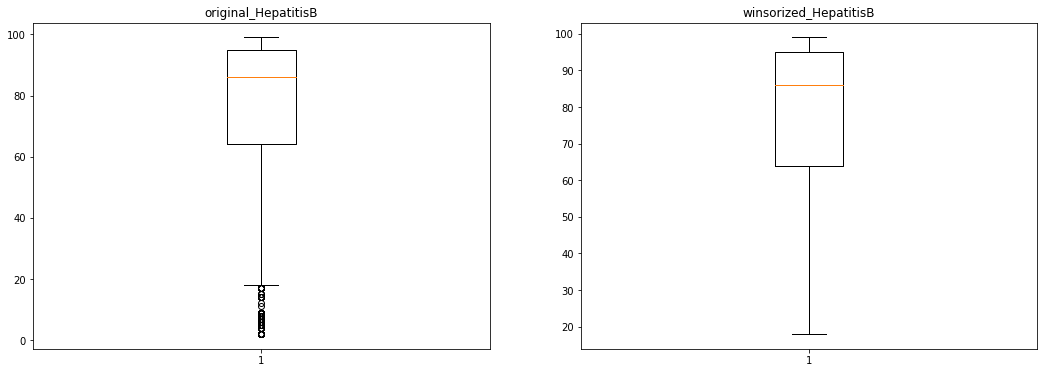

In [16]:
# Winsorize HepatitisB
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = Life_Exp['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(Life_Exp['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

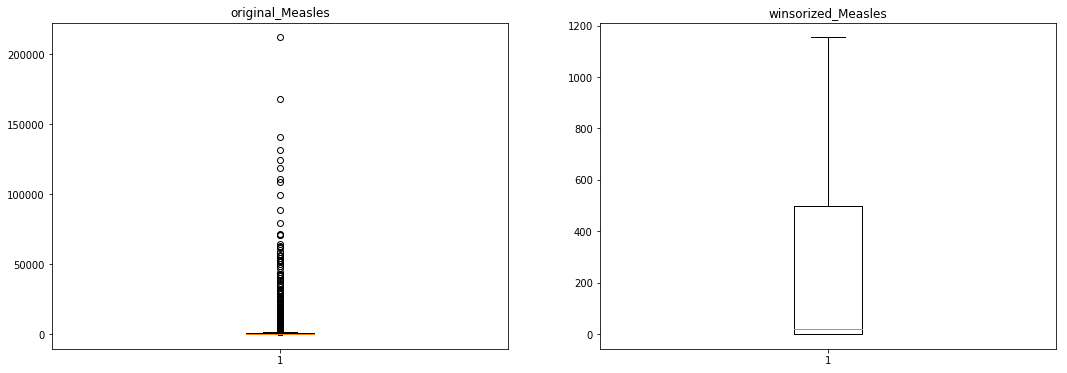

In [17]:
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = Life_Exp['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(Life_Exp['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [18]:
# Windsorization alters a large percentage of the data, which may not give better results. Therefore the column will be dropped
Life_Exp = Life_Exp.drop('Measles',axis=1)

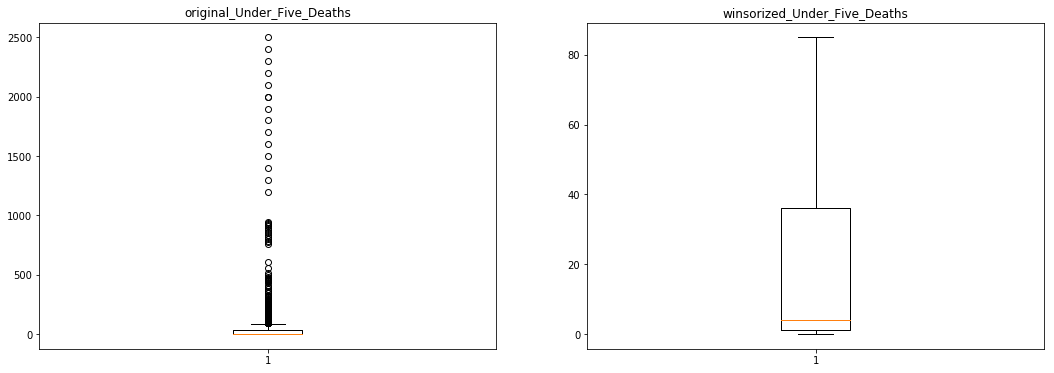

In [19]:
# Winsorize Under_Five_Deaths
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = Life_Exp['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(Life_Exp['Under_Five_Deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()


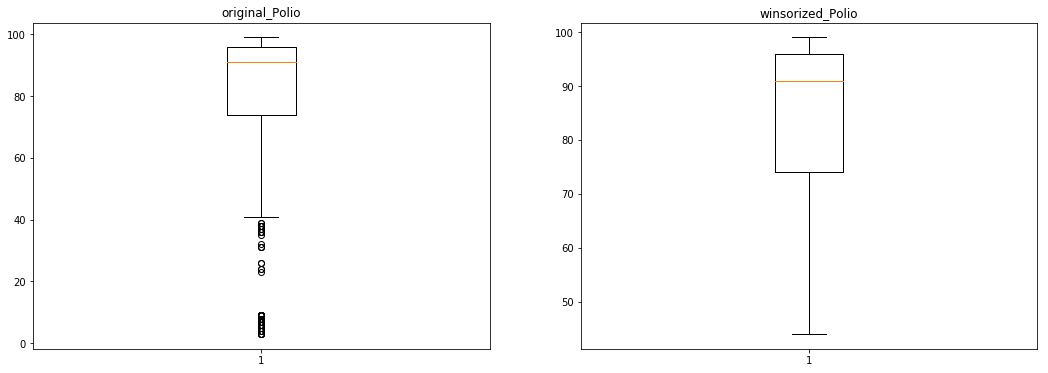

In [20]:
# Winsorize Polio
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = Life_Exp['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(Life_Exp['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

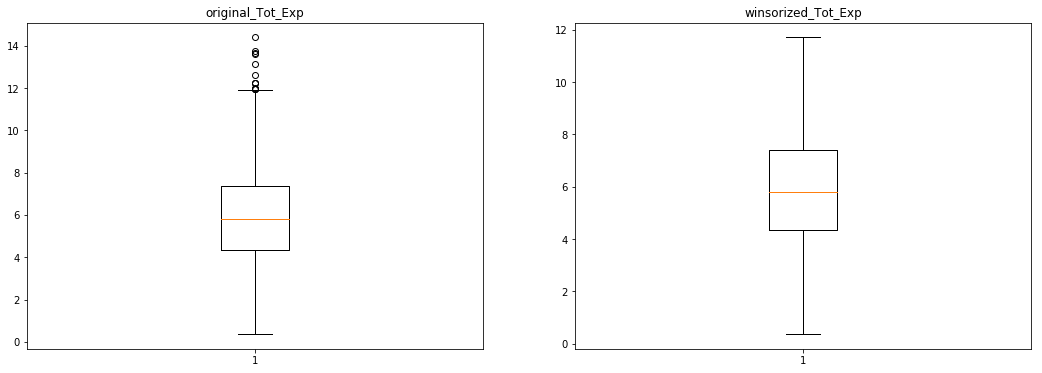

In [21]:
# Winsorize Tot_Exp
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = Life_Exp['Tot_Exp']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(Life_Exp['Tot_Exp'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()


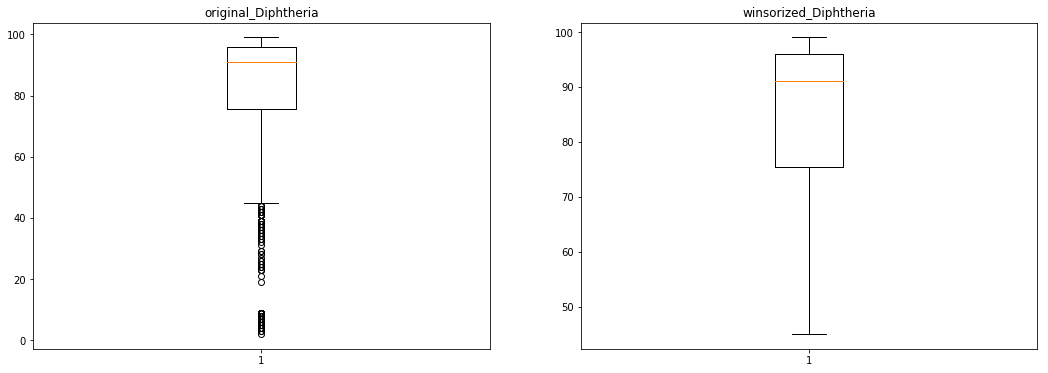

In [22]:
# Winsorize Diphtheria
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = Life_Exp['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(Life_Exp['Diphtheria'],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()


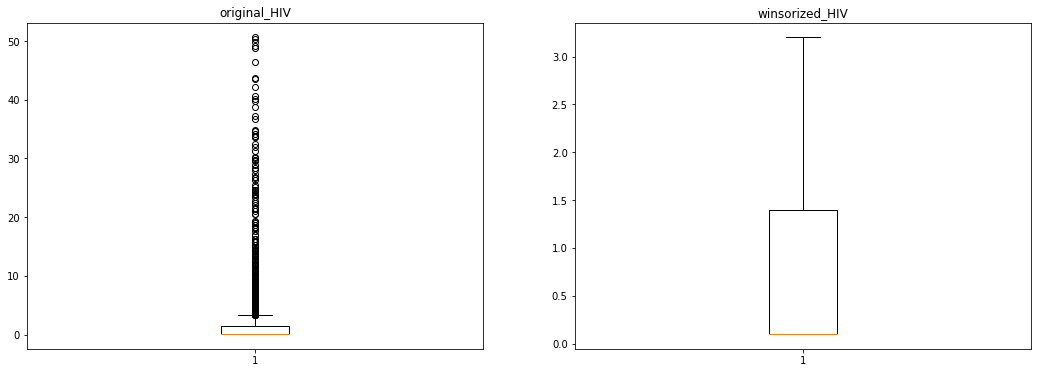

In [23]:
# Winsorize HIV/AIDS
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = Life_Exp['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(Life_Exp['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

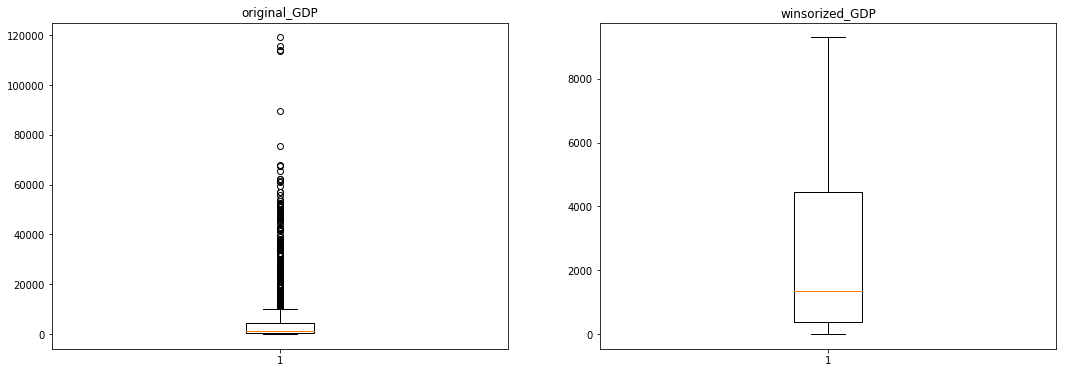

In [24]:
# Winsorize GDP
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = Life_Exp['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(Life_Exp['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

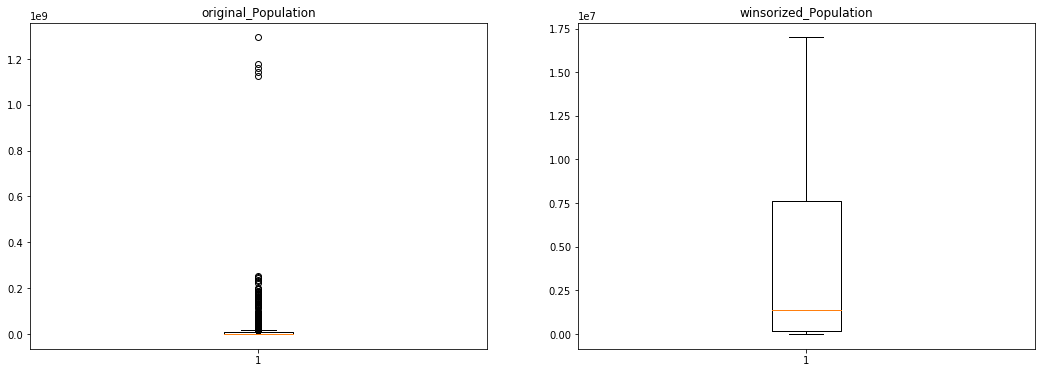

In [25]:
# Winsorize Population
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = Life_Exp['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(Life_Exp['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

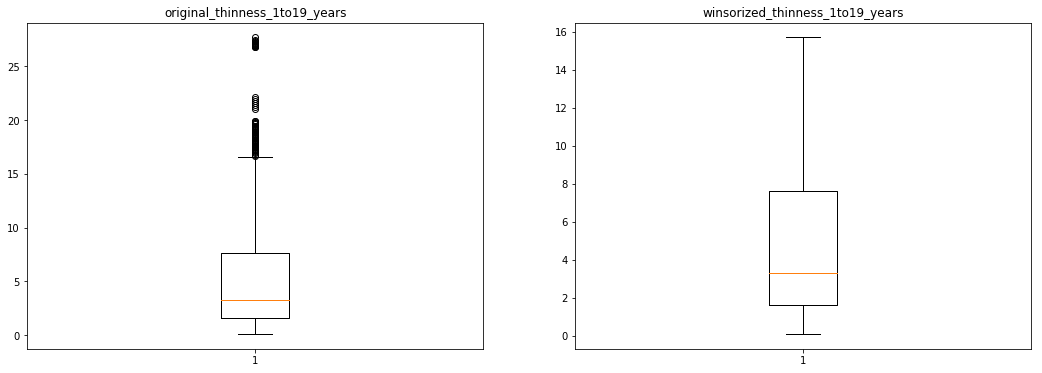

In [26]:
# Winsorize thinness_1to19_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = Life_Exp['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(Life_Exp['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

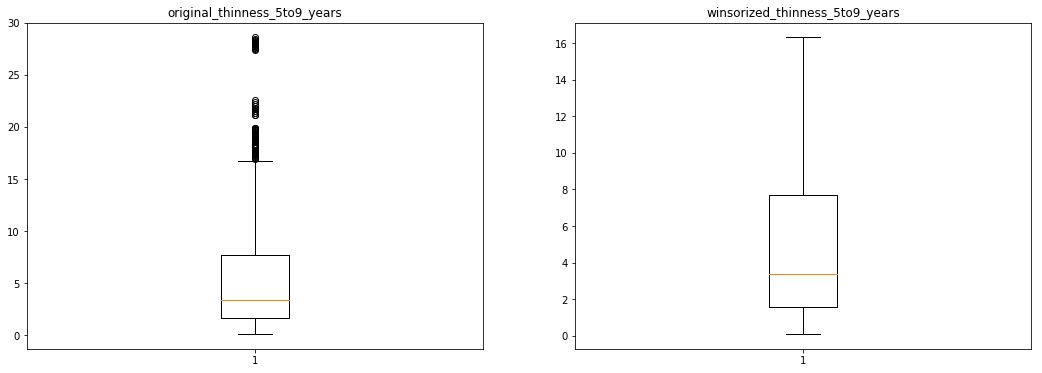

In [27]:
# Winsorize thinness_5to9_years
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = Life_Exp['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(Life_Exp['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

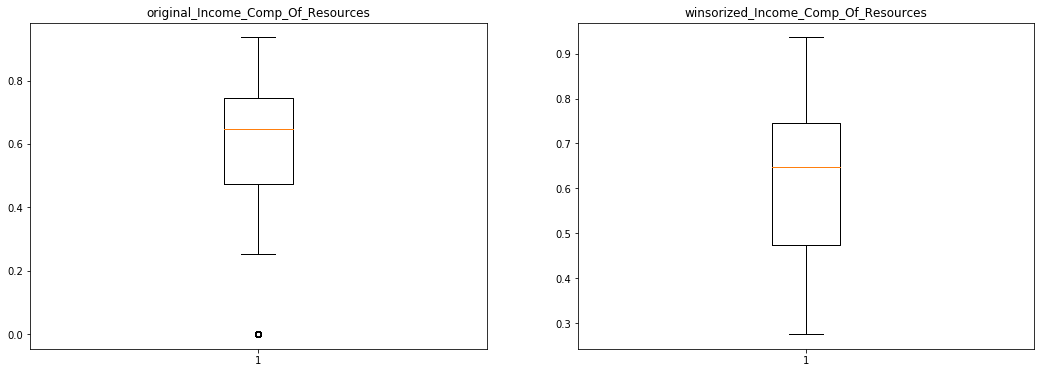

In [28]:
# Winsorize Income_Comp_Of_Resources
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = Life_Exp['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(Life_Exp['Income_Comp_Of_Resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()


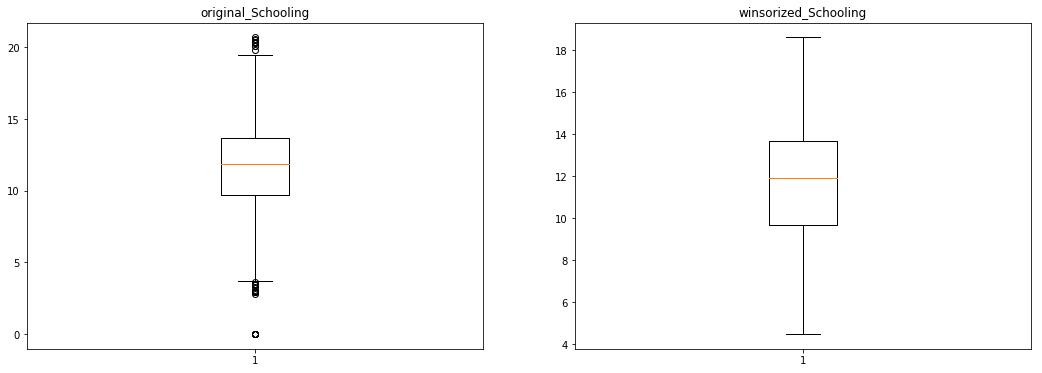

In [29]:
# Winsorize Schooling
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = Life_Exp['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(Life_Exp['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [30]:
# Check number of Outliers after Winsorization for each variable.
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))
    

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


In [31]:
# Adding winsorized variables to the data frame.
Life_Exp['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
Life_Exp['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
Life_Exp['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
Life_Exp['winsorized_Alcohol'] = winsorized_Alcohol
Life_Exp['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
Life_Exp['winsorized_HepatitisB'] = winsorized_HepatitisB
Life_Exp['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
Life_Exp['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
Life_Exp['winsorized_Polio'] = winsorized_Polio
Life_Exp['winsorized_Tot_Exp'] = winsorized_Tot_Exp
Life_Exp['winsorized_Diphtheria'] = winsorized_Diphtheria
Life_Exp['winsorized_HIV'] = winsorized_HIV
Life_Exp['winsorized_GDP'] = winsorized_GDP
Life_Exp['winsorized_Population'] = winsorized_Population
Life_Exp['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
Life_Exp['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
Life_Exp['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
Life_Exp['winsorized_Schooling'] = winsorized_Schooling

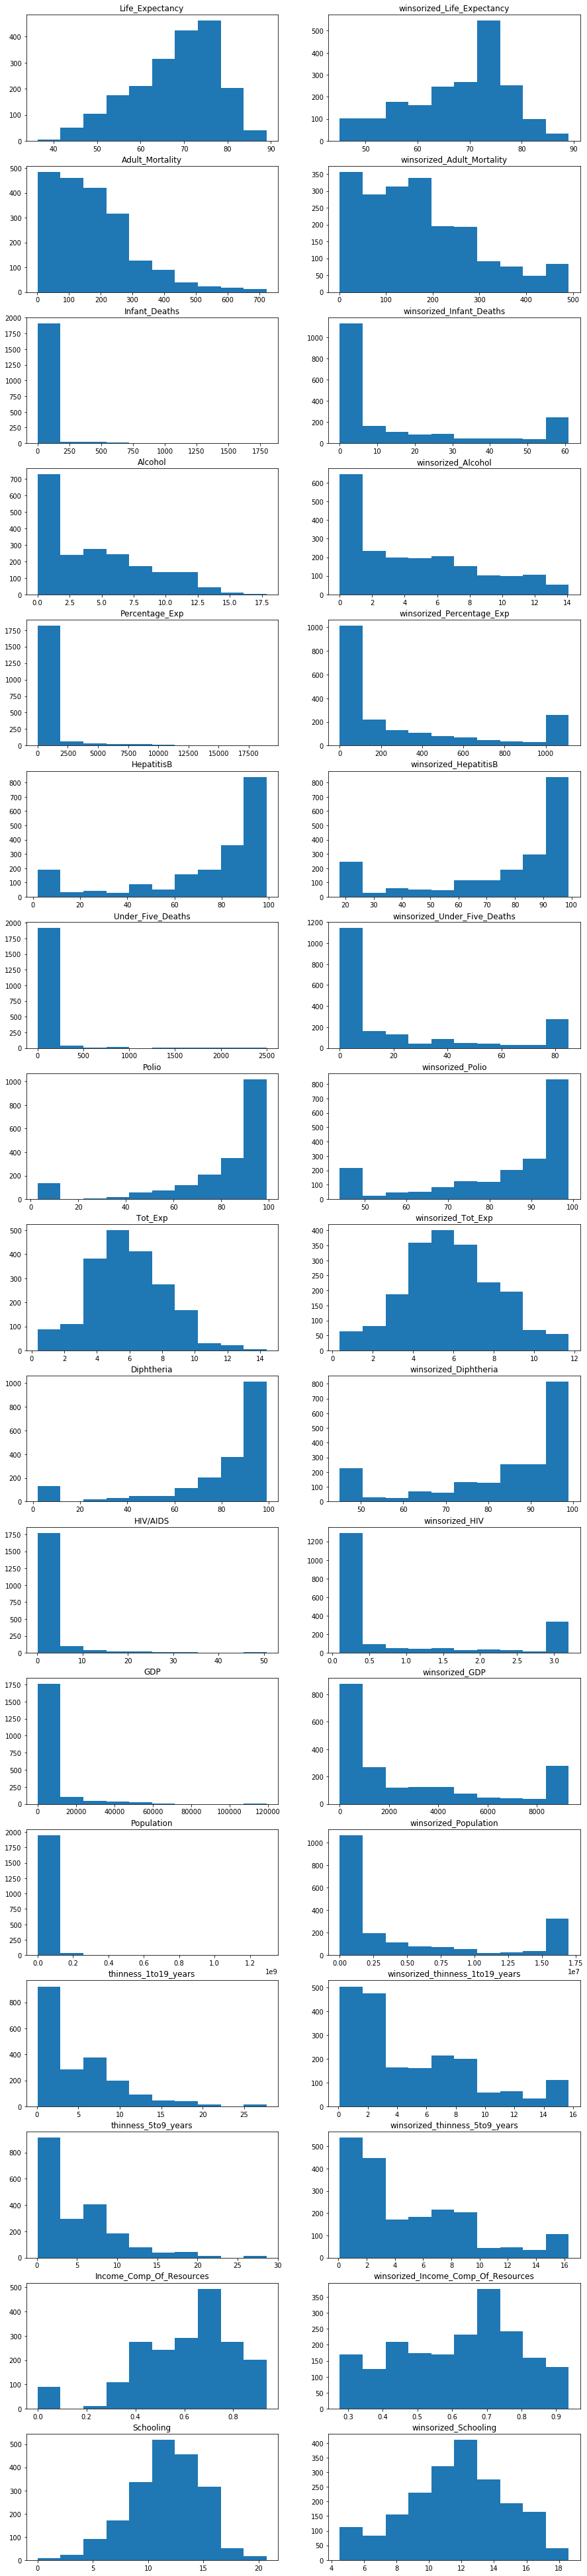

In [32]:
#Univariate Analasys
# Distribution of each numerical variable.
all_col = ['Life_Expectancy','winsorized_Life_Expectancy','Adult_Mortality','winsorized_Adult_Mortality','Infant_Deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','Percentage_Exp','winsorized_Percentage_Exp','HepatitisB',
         'winsorized_HepatitisB','Under_Five_Deaths','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Tot_Exp',
         'winsorized_Tot_Exp','Diphtheria','winsorized_Diphtheria','HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population','thinness_1to19_years','winsorized_thinness_1to19_years','thinness_5to9_years',
         'winsorized_thinness_5to9_years','Income_Comp_Of_Resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(18,2,i+1)
    plt.hist(Life_Exp[all_col[i]])
    plt.title(all_col[i])

plt.show()

In [33]:
# Normally distributed groups:
# winsorized_Life_Expectancy, winsorized_Tot_Exp and winsorized_Schooling 

In [34]:
# Descriptive statistics of categorical variables.
Life_Exp.describe(include=['O'])


,Country,Status
count,1987,1987
unique,133,2
top,Afghanistan,Developing
freq,16,1702


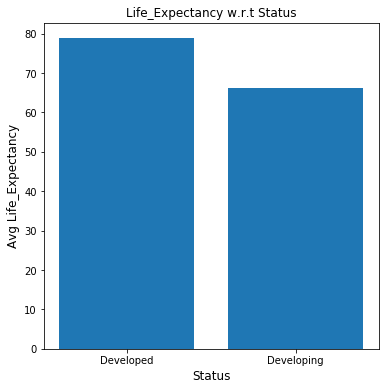

In [35]:
# Life_Expectancy w.r.t Status using bar plot.
plt.figure(figsize=(6,6))
plt.bar(Life_Exp.groupby('Status')['Status'].count().index,Life_Exp.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

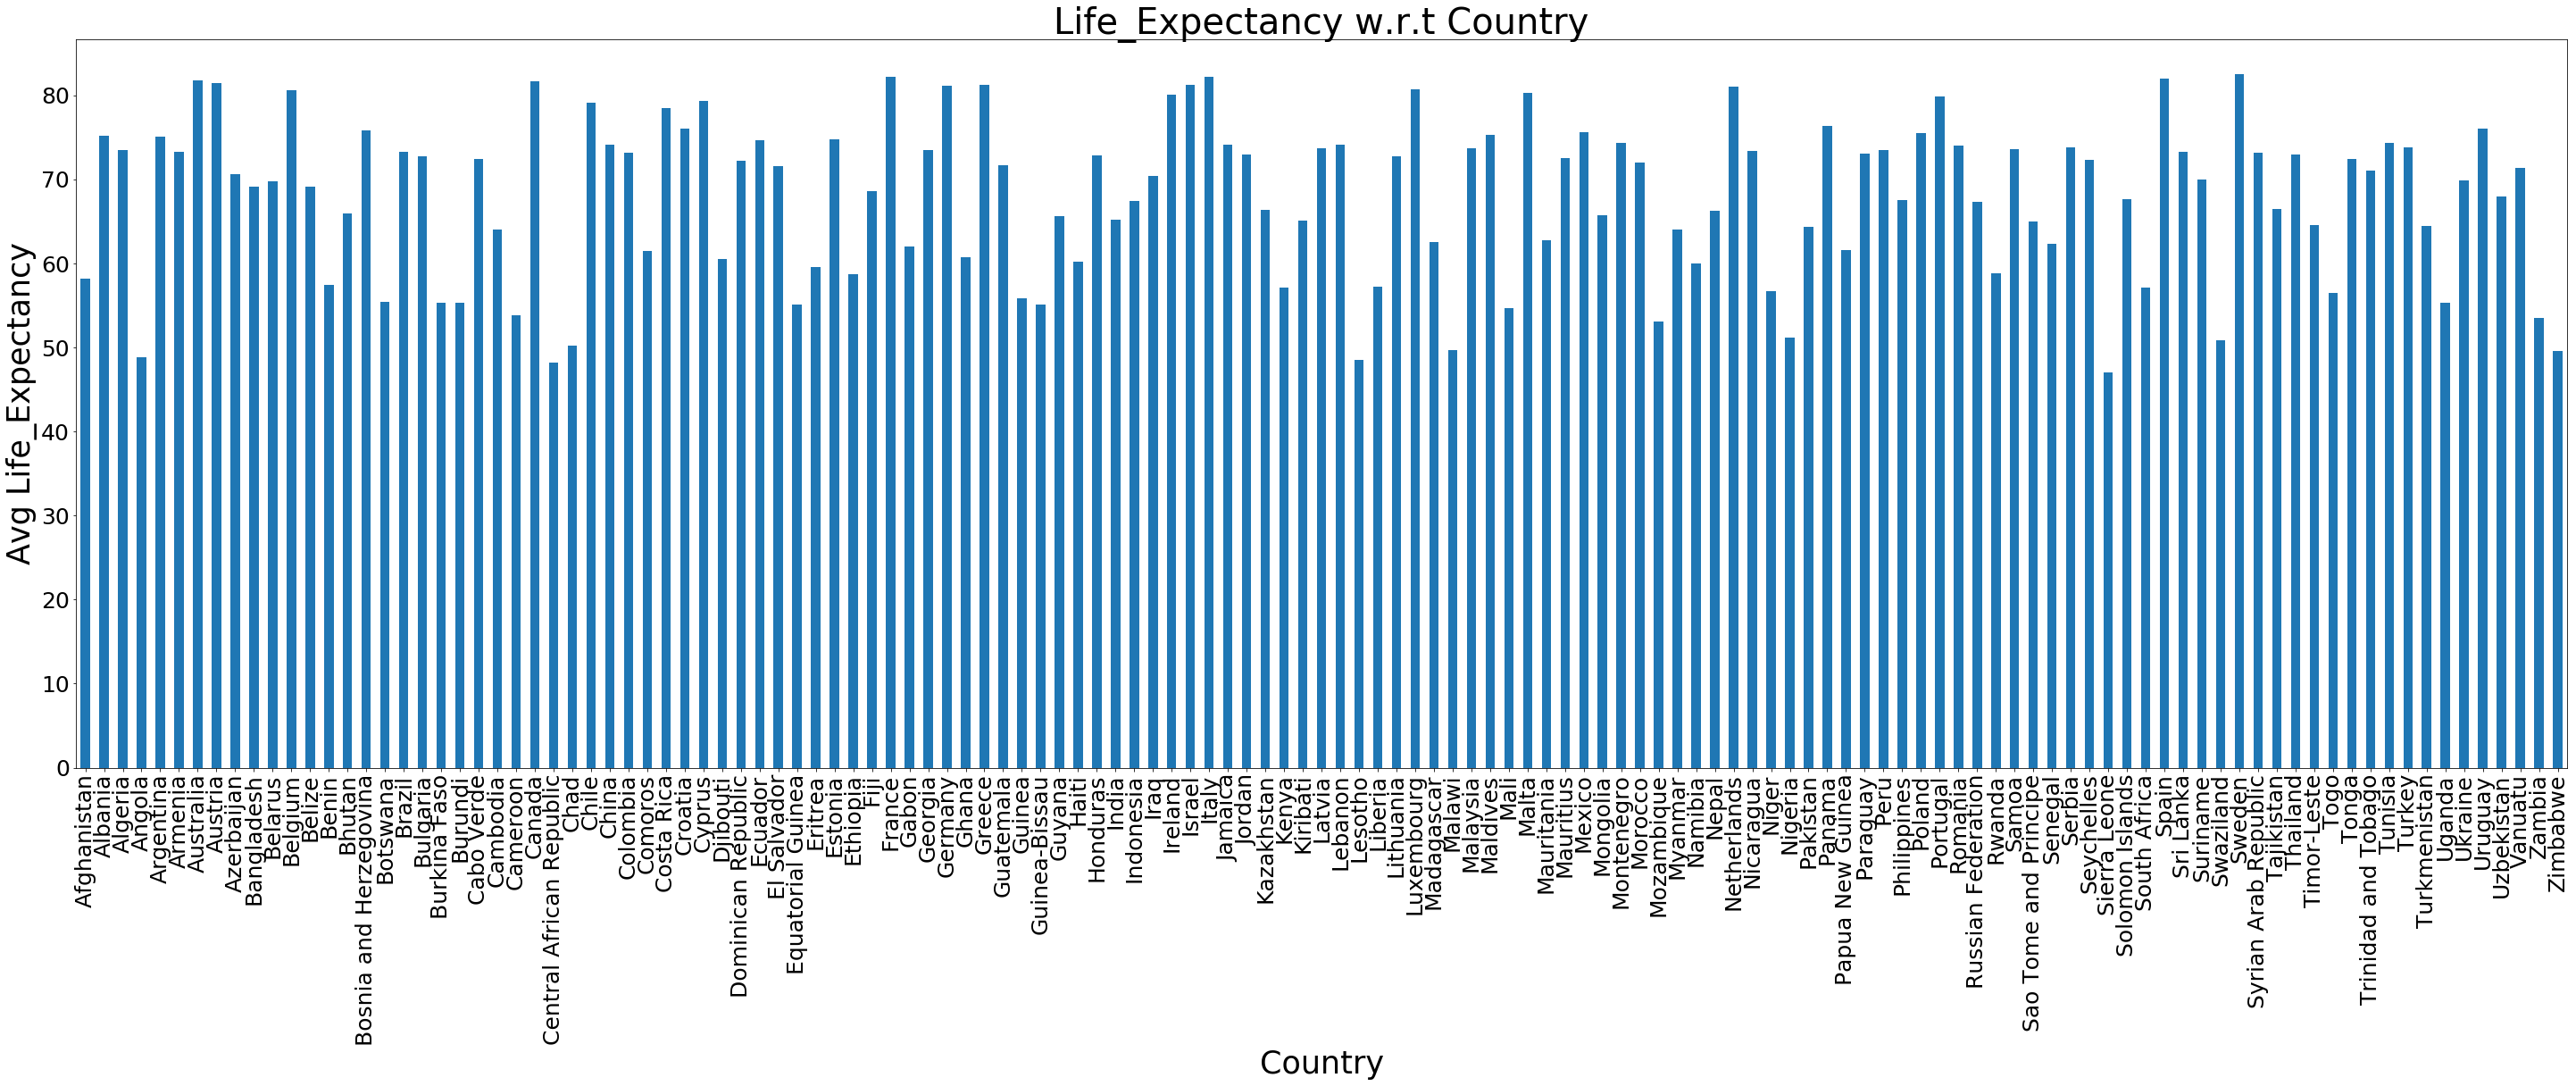

In [36]:
# Life_Expectancy w.r.t Country using bar plot.
Life_Exp_country = Life_Exp.groupby('Country')['winsorized_Life_Expectancy'].mean()
Life_Exp_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

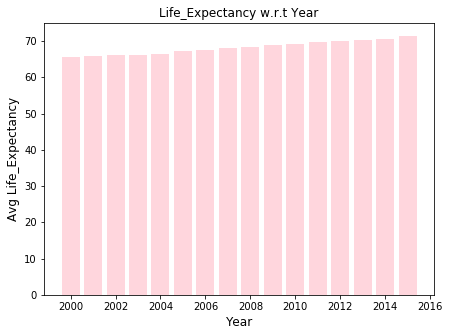

In [37]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(Life_Exp.groupby('Year')['Year'].count().index,Life_Exp.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='pink',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

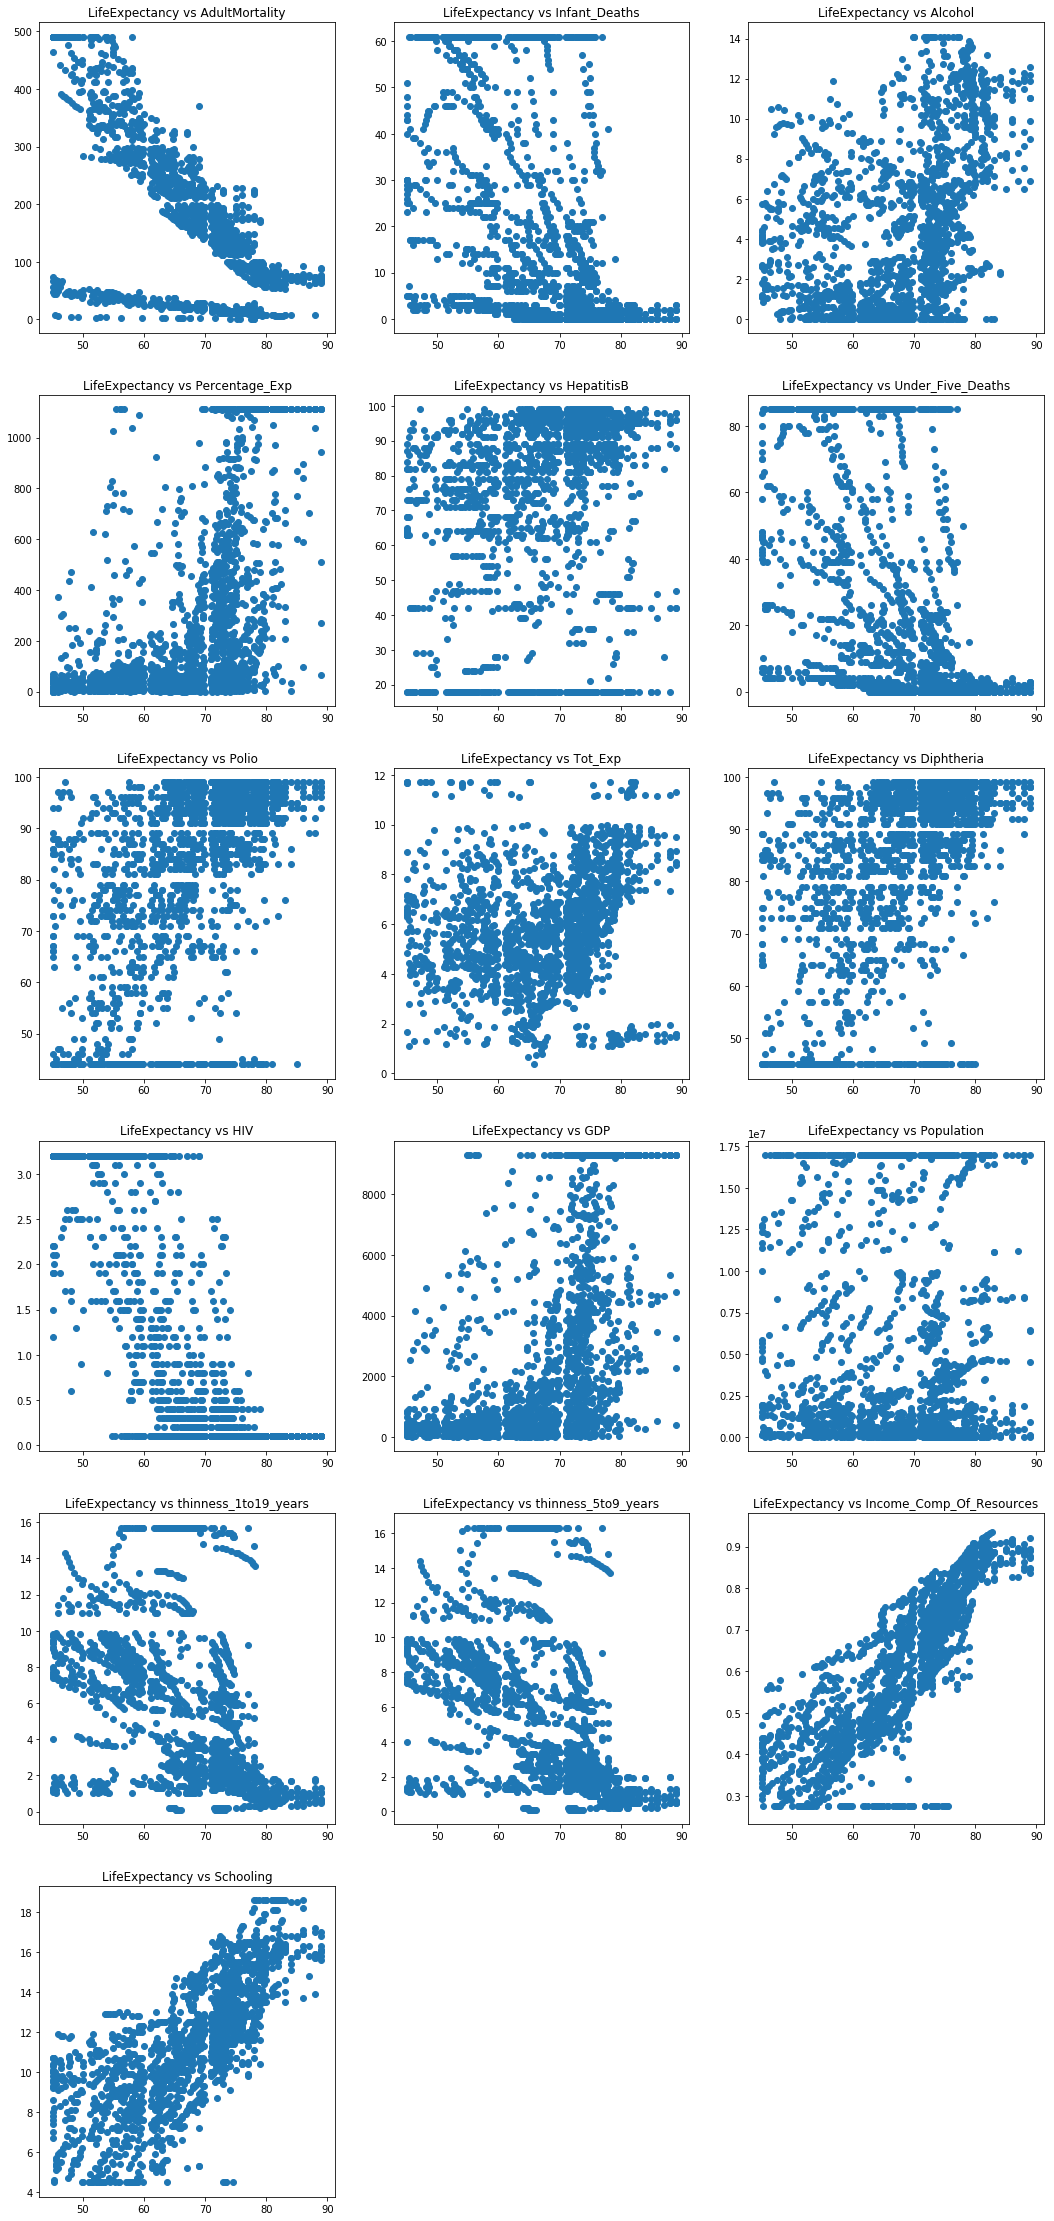

In [38]:
# Scatter plot between the target variable(winsorized_Life_Expectancy) and all continuous variables.
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"],Life_Exp["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(Life_Exp["winsorized_Life_Expectancy"], Life_Exp["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

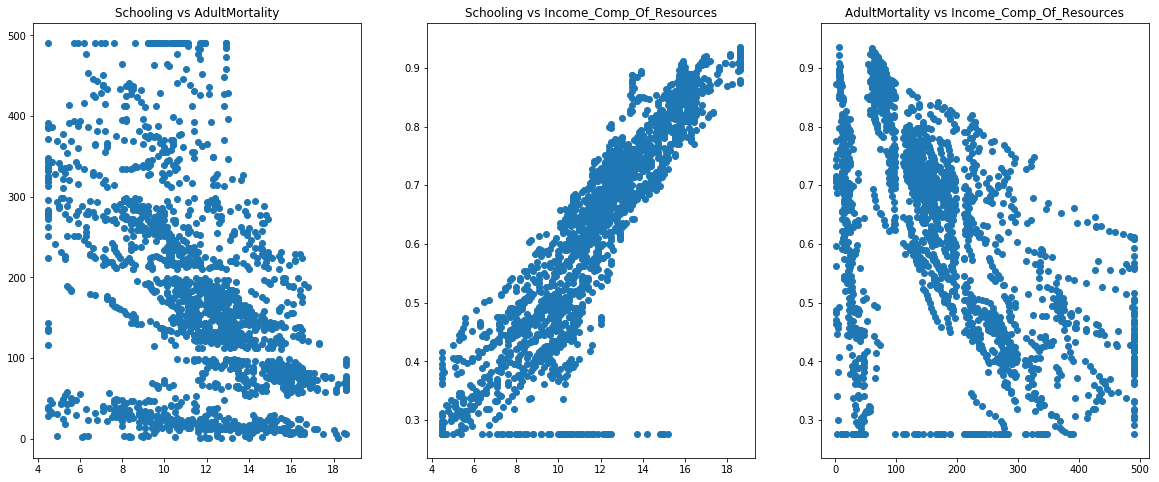

In [39]:
# observe if there is any correlation among the variables that are related to the target variable(winsorized_Life_Expectancy).

plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(Life_Exp["winsorized_Schooling"], Life_Exp["winsorized_Adult_Mortality"])
plt.title("Schooling vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(Life_Exp["winsorized_Schooling"], Life_Exp["winsorized_Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(Life_Exp["winsorized_Adult_Mortality"], Life_Exp["winsorized_Income_Comp_Of_Resources"])
plt.title("AdultMortality vs Income_Comp_Of_Resources")

plt.show()

In [40]:
# Correlation of winsorized variables
Life_Exp_win =Life_Exp.iloc[:,21:]
Life_Exp_win['Country'] = Life_Exp['Country']
Life_Exp_win['Year'] = Life_Exp['Year']
Life_Exp_win['Status'] = Life_Exp['Status']
Life_Exp_win_num = Life_Exp_win.iloc[:,:-3]
cormat = Life_Exp_win_num.corr()

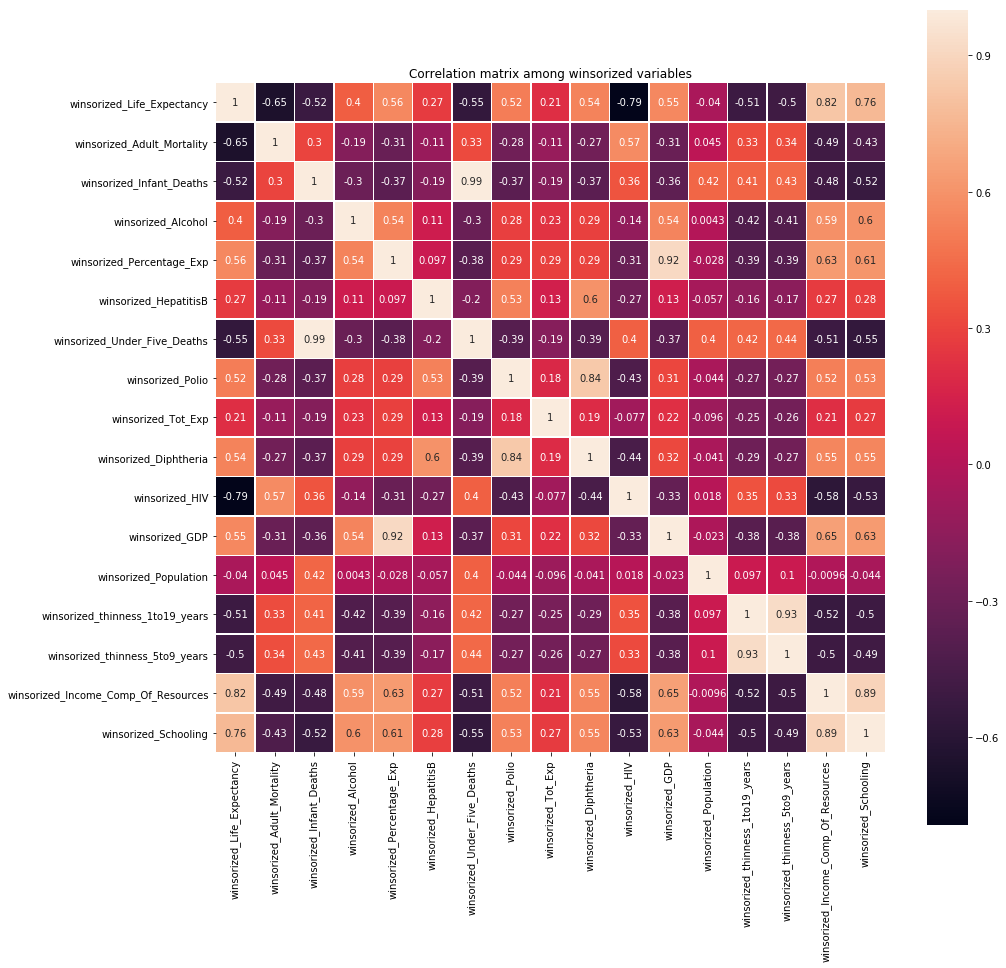

In [41]:
# Using heatmap to confirm inter_relations.
import seaborn as sns

plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among winsorized variables")
plt.show()

# Observations of the Heatmap:

1.winsorized_Income Comp Of Resources is correlated with winsorized_Schooling.
2.winsorized_thinness 1 to 19 years and winsorized_thinness 5 to 9 years are correlated.
3.winsorized_Polio and winsorized_Diphtheria are correlated.
4.winsorized_Percentage Exp and winsorized_GDP are correlated.
5.winsorized_Income Comp Of Resources and winsorized_Life Expectancy are correlated.
6.winsorized_Life Expectancy and winsorized_Schooling are correlated.
7.winsorized_Infant Deaths and winsorized_Under Five Deaths are correlated.
8.winsorized_HIV has negative relation with winsorized_Life Expectancy.
9.winsorized_Adult Mortality has negative relation with winsorized_Life Expectancy.

In [43]:
#Feature Engineering

round(Life_Exp[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.16


In [44]:
#From the above, developed countries have higher average Life_Expectancy compared to Developing.Let us find out statistically if this difference is significant.

In [45]:
# Finding the significance of difference of Average_Life_Expectancy between Developed and Developing countries using 
# t-test
import scipy.stats as stats
stats.ttest_ind(Life_Exp.loc[Life_Exp['Status']=='Developed','Life_Expectancy'],Life_Exp.loc[Life_Exp['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

# p value is < 0.05
This means the difference of Average Life Expectancy between Developed and Developing countries is significant. We can consider 'Status' as a feature as it is related to Life Expectancy.

Let us create a new data frame with feature columns correlated to Life Expectancy. As per the correlation heatmap, it
is clear that the following fields are correlated with winsorized_Life Expectancy:

1.winsorized_Schooling

2.winsorized_Income Comp Of Resources

3.winsorized_HIV

4.winsorized_Adult Mortality

It is also noticed that winsorized_Income Comp Of Resources is correlated with winsorized_Schooling.
All the features should NOT be inter related and hence let us eliminate one of these based on the correlation
value w.r.t winsorized_Life Expectancy.

winsorized_Income Comp Of Resources correlation with winsorized_Life Expectancy = 0.82
winsorized_Schooling correlation with winsorized_Life_Expectancy = 0.76

Let us eliminate winsorized_Schooling as it has relatively low correlation factor. Also, we can choose 'Status' as an important feature based on the above analysis.

In [46]:
# Create a data frame with features.
feature_df = Life_Exp[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV','winsorized_Adult_Mortality']]

In [50]:
# Convert categorical values to numerical values using encoding for 'Status' feature.
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.head()

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Developing,Developing
0,65.0,0.479,0.1,263.0,1,1
1,59.9,0.476,0.1,271.0,1,1
2,59.9,0.470,0.1,268.0,1,1
3,59.5,0.463,0.1,272.0,1,1
4,59.2,0.454,0.1,275.0,1,1


After windsorizing  and t- test I was able to discover what factors had the largest range and what factors had little to no effect. I was not surprised to the largest feature is life expectancy between Developed and Developing countries. I would countinue test on those two groups separately and with the same last three factors. 